
# Homework 4: Confidence intervals, hypothesis testing, and p-values
***

**Name**: Tristan Thomas

***

This assignment is due on Moodle by **11:59 PM on Friday 3 April**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 


In [1]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<br>


### [20 points] Problem 1 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=8$ (location) and $\beta=2$ (scale).  Be sure to leave this cell executed before turning in your assignment! Make your histogram faces coral with gray edges.

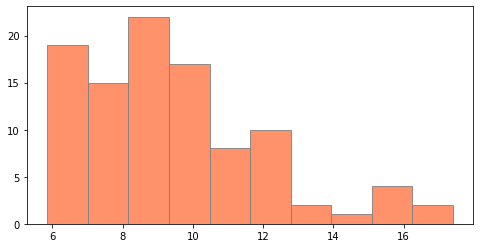

In [220]:
mu = 8
beta = 2
n_sample = 100
x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n_sample)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
ax.hist(x, facecolor="coral", edgecolor="gray", alpha = 0.85, histtype="bar", density=False)

plt.show()

**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=8$ and $\beta=2$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. Note that the version of the Gumbel we are using is *right-skewed*, and is the version used to model maximal extreme events.

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 95% confidence interval for the mean.

In [222]:
mean = mu + (beta*np.euler_gamma)
variance = ((math.pi**2)/6)*(beta**2)
sigma = math.sqrt(variance)
empMean = x.mean()
print("Analytical mean:",mean)
print("Analytical variance:",variance)
print("Empirical Mean:",empMean)
zCrit = stats.norm.ppf(1-0.025)
print("Zcrit:",zCrit)
lowerCI = empMean-zCrit*(sigma/math.sqrt(n_sample))
upperCI = empMean+zCrit*(sigma/math.sqrt(n_sample))
print("95% Confidence Interval:[",lowerCI,",",upperCI,"]")

Analytical mean: 9.154431329803066
Analytical variance: 6.579736267392906
Empirical Mean: 9.454895037545137
Zcrit: 1.959963984540054
95% Confidence Interval:[ 8.952144742446094 , 9.95764533264418 ]


The empirical mean from **Part A** was $9.455$. The true variance of the Gumbel Distribution is $\frac{\pi ^2}{6}(\beta^2)=\frac{\pi ^2}{6}(2^2)=6.58$. A 95% confidence interval for the mean can be found using: [$\bar{x}\pm z_{\alpha /2}\cdot \frac{\sigma}{\sqrt{n}}$]. Our $\bar{x}$ is our emprical mean, so $\bar{x}=9.455$. Our $\sigma$ is the true standard deviation, so $\sigma=6.58$. Our $n=100$, and our $\alpha = 0.05$ so we can use python to find our $z_{crit}=1.96$. Using python as a calculator above, we arrive at a 95% confidence interval for the mean of $[8.95,9.96]$.

**Part C:  A theoretical interlude.** When Amy, the famous hedgehog data scientist, ran her solution code for **Part B**, she obtained a 95% confidence interval of $[8.81, 9.82]$ for the mean of the $Gum(\mu=8, \beta=2)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=8, \beta=2)$ distribution, you could say there is a 95% chance that its true mean falls between 8.81 and 9.82.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gum(\mu=8, \beta=2)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii)** If we sample 100 random variables from the $Gum(\mu=8, \beta=2)$ distribution, then roughly 95% of them will be between 8.81 and 9.82.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=8, \beta=2)$ distribution, you could say there is a 95% chance that its true mean falls between 8.81 and 9.82. \
    This is an incorrect interpretation because we can not use a confidence interval to assign any sort of probability or chance that the true mean lies in a single confidence interval.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gum(\mu=8, \beta=2)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean. \
    This is a correct interpretation, you can expect 95% of your calculated 95% confidence intervals to contain the true mean.

**(iii)** If we sample 100 random variables from the $Gum(\mu=8, \beta=2)$ distribution, then roughly 95% of them will be between 8.81 and 9.82. \
    This is an incorrect interpretation because the calculated confidence interval is with respective to sampled $means$, not individually sampled variables.

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  For each random sample, compute the 66% confidence interval for the mean. Note that you actually know the variance for the true population distribution, $\sigma^2$ from Part B.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals steelblue if they cover the true mean, and coral if they don't.  

Be sure to leave this cell executed before turning in your assignment!

65.8% of confidence intervals successfully cover the true mean of the distribution.

Proportion of confidence intervals that successfully cover the true mean of the distribution: 0.658


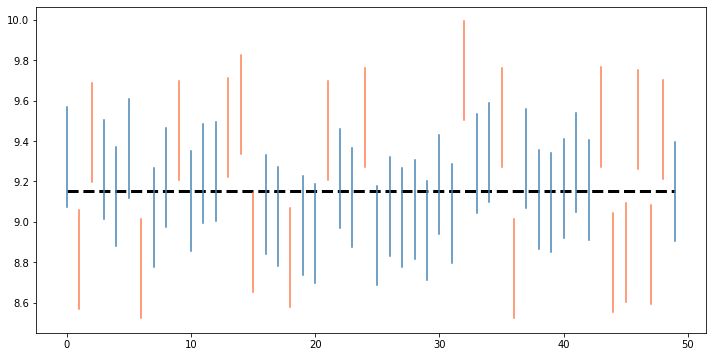

In [282]:
# GIVEN CODE:
m = 500 # Number of samples taken
n = 100 # Size of each sample taken
Xlower = []
Xupper = []

def confidence_intervals(m=500, n=100):
    mu = 8
    beta = 2
    variance = ((math.pi**2)/6)*(beta**2)
    sigma = math.sqrt(variance)
    trueMean = mu + (beta*np.euler_gamma)
    count = 0
    alpha = 0.34
    for xi in range(m):
        x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n)
        empMean = x.mean()
        z_alpha = stats.norm.ppf(1-alpha/2)
        lowerCI = empMean-z_alpha*(sigma/math.sqrt(n_sample))
        upperCI = empMean+z_alpha*(sigma/math.sqrt(n_sample))
        Xlower.append(lowerCI)
        Xupper.append(upperCI)
        if trueMean >= lowerCI and trueMean <= upperCI:
            count+=1
    print("Proportion of confidence intervals that successfully cover the true mean of the distribution:",count/m)
    indices = np.random.choice(np.arange(0,m), size=50, replace=False)
    confidenceIntervals = []
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    ax.plot([0,49], [trueMean, trueMean], color="black", ls='--', lw=3)
    numGraphed = 0
    for xi in indices:
        if trueMean >= Xlower[xi] and trueMean <= Xupper[xi]:
            ax.plot([numGraphed, numGraphed], [Xlower[xi], Xupper[xi]], color = "steelblue")
        else:
            ax.plot([numGraphed, numGraphed], [Xlower[xi], Xupper[xi]], color = "coral")
        numGraphed+=1
        
# Your code goes here!
confidence_intervals(m=m,n=n)

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

Yes, the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class. Calculating multiple 66% confidence intervals, we can expect approximately 66% of these confidence intervals to cover the true mean and 65.8% of our calculated confidence intervals did cover the true mean.

---


### [20 points] Problem 2 - Taco Town!!

You're an intern in the office of the City of Boulder's official Food Rater, and in order to support her in her extremely important job, you have to determine whether Taco Bell or Del Taco has the empirically better tacos. 

"Don't worry," you tell your boss. "I'll have you know I graduated top of my class from CU Boulder, and I've been involved in numerous data science operations on difficult data sets - many of which are hedgehog-related - and I have over 300 confirmed confidence intervals. I am trained in Numpy and Pandas and I'm the top data scientist in the entire campus."

"Weird flex but OK," your boss responds, and gives you the data. The data set consists of 100 diners who ate both Taco Bell and Del Taco, and rated their meal enjoyment at each. As is often the case with fast food taco establishments, each diner ate alone and each meal was followed by about 3 weeks of intense therapy, so the diners and meals may all be considered to be independent of one another. The meal enjoyment ratings are in units of *mehs*, where lower values denote more disgust and a worse meal, and higher values are better.

**Part A:** Import the data set `taco_time.csv` as a Pandas DataFrame.

Then, plot a density histogram of the data. Include both Taco Bell and Del Taco on the same set of axes. Be sure to label your axes, and make the histogram faces slightly transparent and include a legend, so we can tell the two data sets apart. Use colors for each restaurant that are representative of that restaurant's logo or branding.

Finally, formulate a hypothesis about which restaurant has the higher mean meal enjoyment.

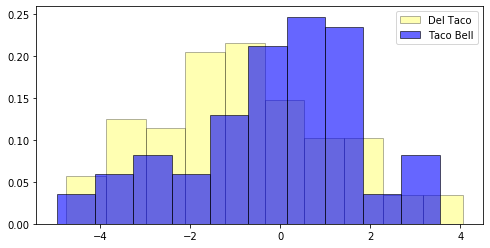

In [285]:
# Path to the data - select the path that works for you 
file_path = '../data/taco_time.csv'

# Load the data into a DataFrame 
df = pd.read_csv(file_path)

delTaco = np.array(df['Del Taco'])
tacoBell = np.array(df['Taco Bell'])

fig, ax = plt.subplots(figsize=(8,4))

ax.hist(delTaco, facecolor="yellow", edgecolor="black", alpha = 0.3, label = "Del Taco", density=True)
ax.hist(tacoBell, facecolor="blue", edgecolor="black", alpha = 0.6, label = "Taco Bell", density=True)
ax.legend()
plt.show()

I hypothesize that Taco Bell has the higher mean meal enjoyment.

**Part B:** Compute a 95% confidence interval for the mean enjoyment of Taco Bell meals, and a separate 95% confidence interval for the mean enjoyment of Del Taco meals. You can use Python as a calculator, but the set-up and groundwork for your computation should be in Markdown/MathJax.

Based on those confidence intervals, can we conclude that the means are different at the 95% level of confidence?

In the python cell below are my calculations for the confidence intervals. The confidence intervals are found using the following formulation: $[\bar{x}-z_{\alpha /2}\frac{\sigma}{\sqrt{n}},\bar{x}+z_{\alpha /2}\frac{\sigma}{\sqrt{n}}]$. Python was used to find $\bar{x}_{TacoBell}=-0.114$ and $\bar{x}_{DelTaco}=-0.834$. Python was also used to find the standard deviation for Taco Bell and Del Taco to be 1.883 and 1.910 respectively. Because we have a confidence level of 95%, our $\alpha=0.05$ and thus our $z_{crit}=1.96$. For both Taco Bell and Del Taco, our $n=100$. We can then plug all of these values into our formula for a confidence interval and arrive at a confidence interval of [-0.483,0.255] for Taco Bell and a confidence interval of [-1.209,-0.460] for Del Taco. It appears that Taco Bell has a higher mean enjoyment but it is not to be said definitively because there is $some$ overlap in our two intervals.

In [287]:
tBellxBar = df['Taco Bell'].mean()
tBellstdDev = df['Taco Bell'].std()
delTacoxBar = df['Del Taco'].mean()
delTacostdDev = df['Del Taco'].std()
zCrit = (stats.norm.ppf(1-0.025))
# For Taco Bell:
lowerCI = tBellxBar - (zCrit*(tBellstdDev/(math.sqrt(100))))
upperCI = tBellxBar + (zCrit*(tBellstdDev/(math.sqrt(100))))
print("Taco Bell 95% Confidence Interval:[",lowerCI,",",upperCI,"]")

# For Del Taco:
lowerCI = delTacoxBar - (zCrit*(delTacostdDev/(math.sqrt(100))))
upperCI = delTacoxBar + (zCrit*(delTacostdDev/(math.sqrt(100))))
print("Del Taco 95% Confidence Interval:[",lowerCI,",",upperCI,"]")

Taco Bell 95% Confidence Interval:[ -0.4826553851642996 , 0.2552717299348196 ]
Del Taco 95% Confidence Interval:[ -1.2086317569622285 , -0.46006263528186436 ]


**Part C:** Compute a 95% confidence interval for the difference between the mean enjoyment of Taco Bell and Del Taco food. 

We can compute a 95% confidence interval for the difference between the mean enjoyment of Taco Bell and Del Taco with the following formulation: $(\bar{X}-\bar{Y})\pm z_{\alpha/2}\cdot \sqrt{\frac{\sigma_1^2}{m}+\frac{\sigma_2^2}{n}}$. Our $\bar{X} = −0.114$ as the mean of Taco Bell, and our $\bar{Y} = −0.834$ as the mean of Del Taco. Our $\sigma_1=1.883$ as the standard deviation of Taco Bell, and our $\sigma_2=1.910$ as the standard deviation of Del Taco. Both $m$ and $n$ are both 100, and our $z_{crit}=1.96$ as provided by using python to find $z_{0.05/2}$. Using python as a calculator below, we arrive at the 95% confidence interval of [0.195,1.246] for the difference between the mean enjoyment of Taco Bell and Del Taco food.

In [60]:
tBellxBar = df['Taco Bell'].mean()
tBellstdDev = df['Taco Bell'].std()
delTacoxBar = df['Del Taco'].mean()
delTacostdDev = df['Del Taco'].std()
zCrit = (stats.norm.ppf(1-0.025))
diffMeans = tBellxBar - delTacoxBar
standardDevs = math.sqrt(((tBellstdDev**2)/100)+((delTacostdDev**2)/100))
lowerCI = diffMeans - (zCrit*standardDevs)
upperCI = diffMeans + (zCrit*standardDevs)
print("95% Confidence Interval:[",lowerCI,",",upperCI,"]")

95% Confidence Interval:[ 0.19508611590308966 , 1.2462246211115233 ]


**Part D:** Comment on how the results from this two-sample confidence interval compare to the results from the separate one-sample confidence intervals. In 1-2 sentences, discuss how these results confirm, disprove, or otherwise relate to your hypothesis from Part A.

Using out two-sample confidence interval, we can conclude that the mean enjoyment of Taco Bell is higher than the mean enjoyment of Del Taco at the 95% level of confidence. We can make this claim because our entire interval lies above 0. The two-sample confidence interval makes it much more clear than the two seperate confidence intervals that the mean enjoyment of Taco Bell is above that of Del Taco. These results confirm my hypothesis from part A that Taco Bell has a higher mean enjoyment than Del Taco. 

---


### [20 points] Problem 3 - Evaluating Vehicle Performance 

A [1983 study](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.34.6358&rep=rep1&type=pdf) evaluated the gas mileage of a variety of cars manufactured between 1970 and 1983. The study also compiled other interesting attributes for each vehicle, but we will focus on the number of cylinders in the engine for this problem. More information on the data is available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/). Gas mileage is measured in miles-per-gallon, or mpg.

**Part A:** Read the data set and store as a Pandas DataFrame. You will need figure out what additional arguments to `pd.read_csv()` must be provided in order to read the data set properly, based on what represents a separation between two columns of data.

Then, be sure to give all of the columns informative names, if they do not already have some.

Finally, use `drop_na()` to drop any rows with missing values. Missing values are reported with a "?".

In [1]:
file_path = '../data/auto-mpg.data'
colNames = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
dfMPG = pd.read_csv(file_path,sep='\s+',names=colNames) # TODO - need extra arguments to read correctly

# More processing code should go here!
dfMPG.drop( dfMPG[ dfMPG['horsepower'] == '?' ].index , inplace=True)
dfMPG.head()

NameError: name 'pd' is not defined

**Part B**: Assuming the data in this sample are representative of cars from the 1970-1983 time period, find a 90% confidence interval for the mean gas mileage (mpg) of all vehicles from this period. Can we conclude that the mean gas mileage is higher than 20 mpg? Be sure to show all calculations in Python. 

In the python cell below are my calculations for the confidence interval. The confidence interval is found using the following formulation: $[\bar{x}-z_{\alpha /2}\frac{\sigma}{\sqrt{n}},\bar{x}+z_{\alpha /2}\frac{\sigma}{\sqrt{n}}]$. Our $\bar{x}=23.446$, our $\sigma = 7.805$, our $n=392$, and our $z_{\alpha/2}=z_{0.1/2}=1.645$. We find that the 90% confidence interval for the mean mpg of all vehicles from 1970-1983 is [22.797,24.094]. We can conflude that at a 90% confidence level, the mean gas mileage is higher than 20 mpg.

In [290]:
mpg = dfMPG['mpg']
xBAR = mpg.mean()
sigma = mpg.std()
zCrit = stats.norm.ppf(1-0.05)
n = len(mpg)
lowerCI = xBAR - (zCrit*(sigma/math.sqrt(n)))
upperCI = xBAR + (zCrit*(sigma/math.sqrt(n)))
# print(n)
# print(zCrit)
# print("Sigma ",sigma)
# print("Mean",xBAR)
print("90% Confidence Interval:[",lowerCI,",",upperCI,"]")

zTS = (xBAR - 20)/(sigma/math.sqrt(n))
print(zTS)
zCrit = stats.norm.ppf(1-0.1)
print(zCrit)

90% Confidence Interval:[ 22.797496657205375 , 24.094340077488507 ]
8.741273211644696
1.2815515655446004


**Part C**: You are considering buying a new car, but since [gas prices have recently increased dramatically](https://www.energy.gov/eere/vehicles/fact-915-march-7-2016-average-historical-annual-gasoline-pump-price-1929-2015), you are concerned about getting good fuel economy.

Using an appropriate *hypothesis test*, can you conclude at the $\alpha=0.01$ significance level that the mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinder engines? You may consider two populations here: those vehicles with 4 or 6 cylinders, and those vehicles with 8 cylinders in their engines. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

To conclude at the $\alpha=0.01$ significance level that the mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehcles with 8 cylinder engines, we will use the following hypotheses: $H_0:\mu_1-\mu_2 \leq 10$ and $H_a:\mu_1 - \mu_2 > 10$. We can then calculate our test statistic with the following formulation: $z=\frac{(\bar{X}-\bar{Y})-10}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}$. We will then find a p-value of $p=1-\phi(z)$ and if $p<\alpha$ we will reject $H_0$. We use python to find the following values: $\bar{X}=26.54mpg$, $\bar{Y}=14.96mpg$, $\sigma_1=6.71mpg$, $\sigma_2=2.84mpg$, $n_1=282$ and $n_2=103$. Plugging these values into the above equation for z, we arrive at $z=3.24$. Now we calculate $p=1-\phi(z)=0.00059378$. Because $0.00059378<0.01$ ($p<\alpha$), we reject $H_0$ and can claim that at the 99% confidence level, mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinders in their engines. 

In [298]:
alpha = 0.01
fourOrSix = dfMPG.loc[(dfMPG['cylinders'] == 4) | (dfMPG['cylinders'] == 6), ['mpg']]
eight = dfMPG.loc[dfMPG['cylinders'] == 8, ['mpg']]
meanFourOrSix = fourOrSix.mean()
stdDevFourOrSix = fourOrSix.std()
meanEight = eight.mean()
stdDevEight = eight.std()
zStat = ((meanFourOrSix-meanEight)-10)/(math.sqrt(((stdDevFourOrSix**2)/len(fourOrSix))+((stdDevEight**2)/len(eight))))
p = 1-stats.norm.cdf(zStat)
if p<alpha:
    print("Mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinder engines")
else:
    print("Mean gas mileage for vehicles with 4 or 6 cylinder engines is NOT more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinder engines")

Mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinder engines


---


### [20 points] Problem 4 - Grab bag!



<img src="http://blog.localditch.com/wp-content/uploads/2011/01/sonic4.jpg" style="width: 400px;"/>

**Part A**: You work for an engineering firm that has been hired to construct a corkscrew-shaped looped path for hedgehogs to run on and collect gold rings. Thousands of hedgehogs will run along this path each day, so structural failure means injury or death for many wonderful little creatures. 

You are in charge of quality control for the average strength of carbon fiber that will be used to construct the corkscrew path. Thinking back fondly to your days in CSCI 3022, you set up a hypothesis test in which your alternative hypothesis is that the strength of the carbon fiber is below tolerance, and therefore unsafe. What is the null hypothesis? Would you rather have a low Type I error rate or a low Type II error rate? Explain.

The hypothesis test will be set up as follows: \
$H_o:$ the strength of carbon fiber is at or above tolerance, and therefore safe\
$H_a:$ the strength of carbon fiber is below tolerance, and therefore unsafe \
With this structure of hypotheses, a Type II error would be especially catastrophic. A Type I error would represent the case that we claim the carbon fiber is unsafe, when in reality it is safe. A Type II error would be if we say the carbon fiber is safe, when in reality it is unsafe. For this reason we would rather have a low Type II error rate. This way, if we say the strength of the carbon fiber is safe, we are very sure that it is safe.


**Part B**: Amy, the famous hedgehog data scientist, is working for the same engineering firm as you. She is a legend around the office! Word around the water cooler is that out of all of the 95% confidence intervals that Amy has constructed, 931 of them have turned out to actually capture the true population mean. Since Amy is a data science wizard and you can be sure she is constructing her confidence intervals correctly and collecting and using her data honestly, about how many 95% confidence intervals would you expect her to have constructed total? Explain your reasoning fully with words as well as some math.

I would expect Amy to have constructed a total of 980 confidence intervals. In repeated sampling, 95% of all CIs obtained from sampling will actually contain the true population mean. The other 5% of CIs will not. Thus if you take $931/0.95$, you will find that you can expect Amy to have constructed 980 confidence intervals total.

**Part C**: As part of an outreach program, you and Amy are visiting a local elementary school to talk to the students about data science. What a riot! One of the more astute students asks you a question: "In general, which is wider: a 95% confidence interval or a 99% confidence interval?"

How would you explain this to these young students, who are not fluent in any kind of science? (So, for example, spouting off theory and words like "mean" and "z critical value" probably won't mean anything to them.)

In general, a 99% confidence interval is wider than a 95% confidence interval. If you claim that your 95% confidence interval does contain the true mean, you can expect to be correct 95% of the time. Similaly if you claim that your 99% confidence interval contains the true mean, you can expect to be correct 99% of the time. To be correct 99% of the time as opposed to 95% of the time, you must widen your confidence interval to include more values to ensure that you cover more potential means. 

**Part D:** You observe a sample of 73 pygmy hedgehogs and find that 49 of them are fantastic pets. Then, you observe a sample of 58 long-eared hedgehogs and find that 51 of them are fantastic pets.

Is there statistical evidence at the 0.05 significance level that the true proportion of long-eared hedgehogs that make fantastic pets is 10% higher than the true proportion of pygmy hedgehogs that make fantastic pets? Perform a test that computes and properly interprets a p-value.

To find if there is enough statistical evidence at the 0.05 significance level that the true proportion of long-eared hedgehogs that make fantastic pets is 10% higher than the true proportion of pygmy hedgehogs that make fantastic pets, we can use the following hypotheses:
$$H_0:P_{long-eared}-P_{pygmy}\geq10\%$$
$$H_A:P_{long-eared}-P_{pygmy}<10\%$$
We can use the following formulation to calculate a p-value for our hypotheses: 
$$p=1-\phi(\frac{(P_{long-eared}-P_{pygmy})-10\%}{\sqrt{\frac{P_{long-eared}(1-P_{long-eared})}{n_1}+\frac{P_{pygmy}(1-P_{pygmy})}{n_2}}}) $$
If $p<0.05$, then we reject $H_0$ and accept $H_a$.\
From the question statement, we can assign the following values:
$$P_{long-eared}=\frac{51}{58},n_1=58$$
$$P_{pygmy}=\frac{49}{73},n_2=73$$
Plugging these values into our equation, we can now solve for $p=1-\phi(1.55)=0.06$. Because our p-value is not less than our alpha value, we must accept $H_0$ and thus can conclude that at the 0.05 signifigance level that the true proportion of long-eared hedgehogs that make fantastic pets is 10% higher than the true proportion of pygmy hedgehogs that make fantastic pets.

In [303]:
n1 = 58
n2 = 73
pLE = 51/n1
pP = 49/n2
alpha = 0.05
zStat = ((pLE-pP)-0.1)/(math.sqrt((pLE*(1-pLE)/n1)+(pP*(1-pP)/n2)))
p = 1-stats.norm.cdf(zStat)
if p < alpha:
    print("Reject Null")
else:
    print("Accept Null")

Accept Null


**Part E**: Let $X$ be a normally-distributed random variable representing the difficulty of a homework problem in CSCI 3022. You draw from it more times than you care to count during the Spring 2019 semester and get the following values, stored in the numpy array **toughness**, below. Compute a 90% confidence interval for the _standard deviation_ in problem toughness.

In [306]:
toughness = np.array([7.7778,6.9459,5.8248,9.1111,6.0180,5.0898,7.0380,8.9273,2.9614,5.8387,6.0231])

The 90% confidence interval for the standard deviation in problem toughness can be calculated with the following formulation: 
$$\sqrt{\frac{(n-1)s^2}{X_{1-\alpha/2}^2}}<\sigma<\sqrt{\frac{(n-1)s^2}{X_{\alpha/2}^2}} $$
Using python as a calculator below, we can assign the following values:
$$n=11$$
$$s=1.67$$
$$alpha = 0.1$$
$$X=6.51$$
Plugging in these values to our above inequality we get:
$$\sqrt{\frac{(11-1)1.67^2}{6.51_{1-0.1/2}^2}}<\sigma<\sqrt{\frac{(11-1)1.67^2}{6.51_{0.1/2}^2}} $$

In [312]:
n = len(toughness)
s = toughness.std()
alpha = 1-0.9
X = toughness.mean()

---

<a id='p5'></a>
[Back to top](#top)

### [20 points] Problem 5 - Lies, damned lies, and statistics

![frazz](http://3.bp.blogspot.com/-SbQUWRfHFXk/VdN8YWAy0WI/AAAAAAAAJLw/Ij5E0CbYk6g/s1600/lies3.gif)

Legend of your Data Science prowess has spread o'er the land. You have been contacted by a shadowy organization to assess whether there is statistical evidence for sea-level rise in the area of Key West, Florida. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file included in the zip folder for this assignment. The columns are, in order, the year, month, day-of-month and measured sea level (in millimeters).

**Part A:** Load the data `sealevel_keywest.csv` into a Pandas DataFrame. Rename the columns as something meaningful in the context of this problem. Print to the screen the first 7 rows from your updated DataFrame.

In [314]:
# Path to the data - select the path that works for you 
file_path = '../data/sealevel_keywest.csv'
colNames = ["Year", "Month", "Day-of-Month", "Measured Sea Level (mm)"]

# Load the data into a DataFrame 
df = pd.read_csv(file_path, names = colNames)

df.head(7)

,Year,Month,Day-of-Month,Measured Sea Level (mm)
0,1913,1,20,1453
1,1913,1,21,1439
2,1913,1,22,1444
3,1913,1,23,1489
4,1913,1,24,1474
5,1913,1,25,1442
6,1913,1,26,1467


**Part B:**  Plot the raw time series of sea levels. Be sure to label your axes, including units. For the $x$-axis, place the $x$ tick marks on January 2 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 

In [315]:
print(min(df['Measured Sea Level (mm)']))
print(max(df['Measured Sea Level (mm)']))
print(df['Measured Sea Level (mm)'].mean())

-32767
2112
799.6943661600864


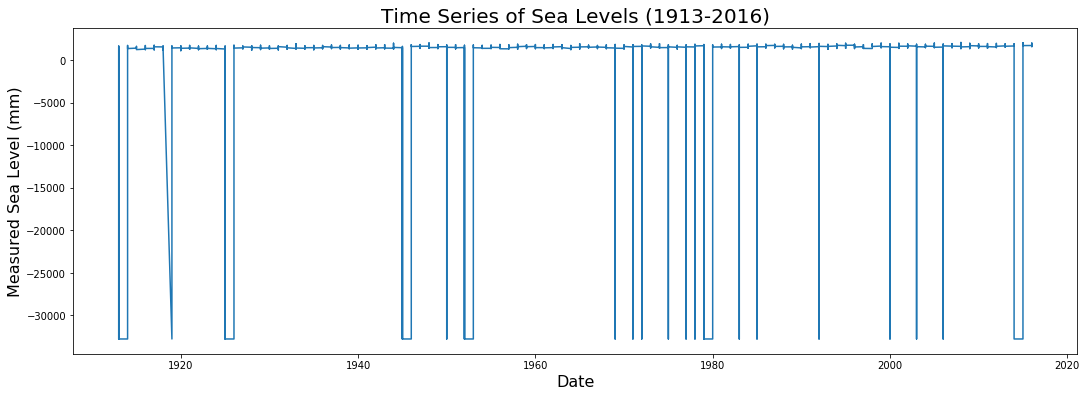

In [277]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(df['Year'],df['Measured Sea Level (mm)'])

# Add a title
ax.set_title("Time Series of Sea Levels (1913-2016)", fontsize=20)

# Add axis labels 
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Measured Sea Level (mm)", fontsize=16)

plt.show()

**Part C:** Your time series plot from Part B should look pretty funky. Namely, there are a bunch of spikes in it! What do you think these spikes represent?

Now, clean your data set by doing the following:
* Remove any data points associated with these spikes. You may need to look back to some of the earlier in-class notebooks and Pandas tutorials for how to drop data points from a Pandas DataFrame. 
* Include only the data point from the second day of each month.
* Convert the sea-level data from millimeters to feet.

Then, make a similar plot to Part B, but of your cleaned data set. Be sure to label axes (including units) and only label January 2 of each year that is divisible by 10.

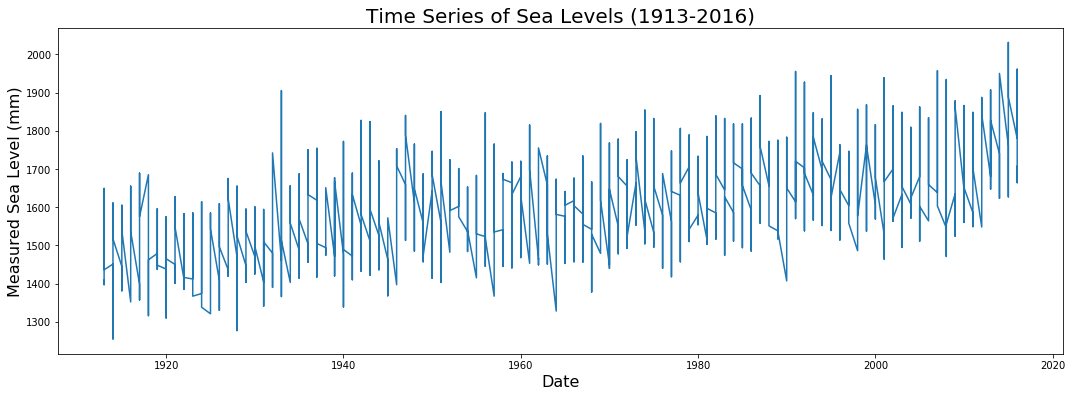

In [279]:
# print("MIN:",min(df['Measured Sea Level (mm)']))
df.drop(df[df['Measured Sea Level (mm)'] < -5000].index, inplace=True)
# print("MIN:",min(df['Measured Sea Level (mm)']))
data = df.loc[df['Day-of-Month']==2, ['Year','Measured Sea Level (mm)']]
data.head()
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(data['Year'],data['Measured Sea Level (mm)'])

# Add a title
ax.set_title("Time Series of Sea Levels (1913-2016)", fontsize=20)

# Add axis labels
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Measured Sea Level (mm)", fontsize=16)

plt.show()

**Part D:** Your mysterious employer owns a lot of beachfront property in Key West and does not want to see people shy away from buying real estate and spending time near the sea. So, they really want to convince others to that the mean sea level in Key West in not increasing. Toward this end, your employer wants to find a decade of data (11 years, including both end points) that has a mean sea level which is not statistically significantly different from the mean sea level in the decade 2000-2010 (including data from both 2000 and 2010). Your employer wants you to use the 99% confidence/1% significance level because it sounds catchy in a press release, and wants the *earliest* decade possible.

Use your cleaned monthly data set from Part C to find the earliest decade for which you cannot conclude the mean sea level at Key West was statistically significantly different from the mean sea level in the 2000-2010 decade. You may want to write a helper function to compute the confidence intervals/perform the hypothesis test for you, because there are a LOT of possible 11-year periods to try.

You may use either hypothesis tests or confidence intervals, but clearly state which method you will use, your results and show all work that leads to your conclusion. 